In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget
from scipy.io import wavfile
import numpy as np

nm = 1e-3
mkm = 1
mm = 1e3
cm = 1e4

In [66]:
def matrix_lcd1(xp,yp, W, H, w, h, xshift, yshift):
    xp /= W
    yp /= H
    # b, w, h = 0.05, 0.4, 0.8
    y = yp%1
    y += 0.03 * (xp%2 < 1)
    y = y%1
    x = xp#(xp + (0.5 * (yp % 2 < 1)))
    flag_w = 1#((x % (1.5)) < 0.5)
    x = x%1
    # y += 0.03 * (xp % 2 < 1)
    y = y % 1
    rect1 = (x > (0.5-xshift-w/2)) & (x < (0.5-xshift+w/2)) & (y > (0.5-yshift-h/2)) & (y < (0.5-yshift+h/2)) & flag_w
    rect2 = (x > (0.5+xshift-w/2)) & (x < (0.5+xshift+w/2)) & (y > (0.5+yshift-h/2)) & (y < (0.5+yshift+h/2)) & flag_w
    return (rect1 | rect2).astype(int)

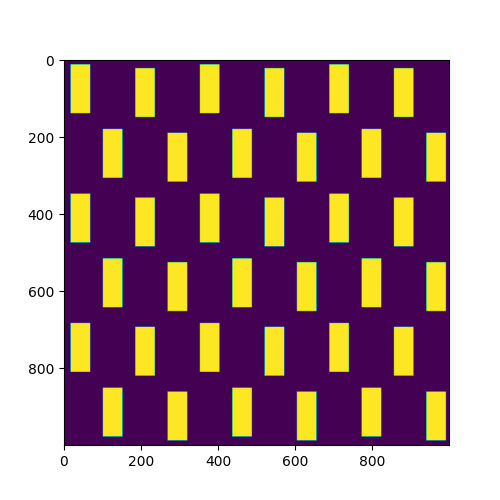

In [68]:
matrix = np.fromfunction(lambda x, y: matrix_lcd1(x,y,*(168 * mkm,2*168*mkm,0.3,0.38,0.25,0.25)), (1000,1000) )
fig = plt.figure(figsize=(5,5))
plt.imshow(matrix.T, interpolation=None)

............................................................................................................................................................................................................................................................................................................

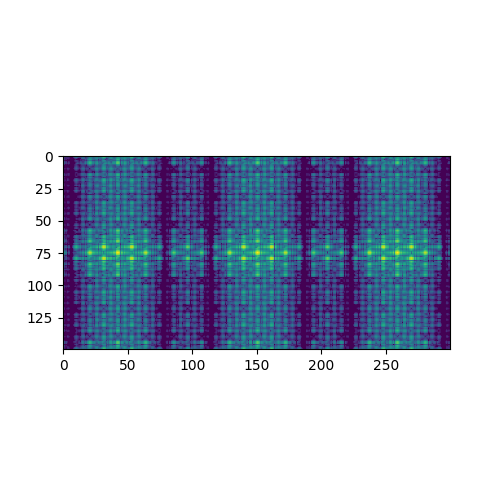

In [69]:
class Difraction:
    def __init__(self, grating, grating_size, grating_step, D, plane, wave, resolution):
        self.grating = grating
        self.grating_size = grating_size
        self.grating_step = grating_step
        self.D = D
        self.plane = plane
        self.wave = wave
        self.resolution = resolution
    def gen_picture(self, grating_pars):
        freq = np.array(self.plane)/self.wave/self.D
        gr_range_x = np.arange(-self.grating_size[0]/2, self.grating_size[0]/2, self.grating_step[0])
        gr_range_y = np.arange(-self.grating_size[1]/2, self.grating_size[1]/2, self.grating_step[1])
        self.matrix = np.zeros((gr_range_x.shape[0], gr_range_y.shape[0]))
        for row in range(gr_range_x.shape[0]):
            for column in range(gr_range_y.shape[0]):
                self.matrix[row, column] = self.grating(gr_range_x[row], gr_range_y[column], *grating_pars)
        def getValue(freqx, freqy):
            sm = 0
            for i,xp in enumerate(gr_range_x):
                for j,yp in enumerate(gr_range_y):
                    if self.matrix[i,j]:
                        sm += np.exp(-2j*np.pi*np.dot([freqx, freqy],[xp,yp]))
                    # print(xp,yp)
            return sm
        picture = np.zeros(self.resolution)
        for i,freqx in enumerate(np.arange(-freq[0]/2, freq[0]/2, freq[0]/self.resolution[0])):
            for j,freqy in enumerate(np.arange(-freq[1]/2, freq[1]/2, freq[1]/self.resolution[1])):
                picture[i,j] = np.power(np.abs(getValue(freqx, freqy)),2)
            print(".", end="")
        return picture

diff = Difraction(matrix_lcd1,grating_size=[5*168 * mkm,5*168*mkm], grating_step=[168/10*mkm,168/10*mkm], D=149*cm, plane=[16*cm, 10*cm],wave=650*nm, resolution=[300,150])
fig,ax = plt.subplots(1,figsize=(5,5))
picture = diff.gen_picture((168 * mkm,2*168*mkm,0.3,0.38,0.25,0.25))
ax.imshow(np.abs(picture.T), norm=matplotlib.colors.LogNorm(vmin=np.min(0.5), vmax=np.max(picture)))        
# ax[1].imshow(np.abs(diff.matrix))        

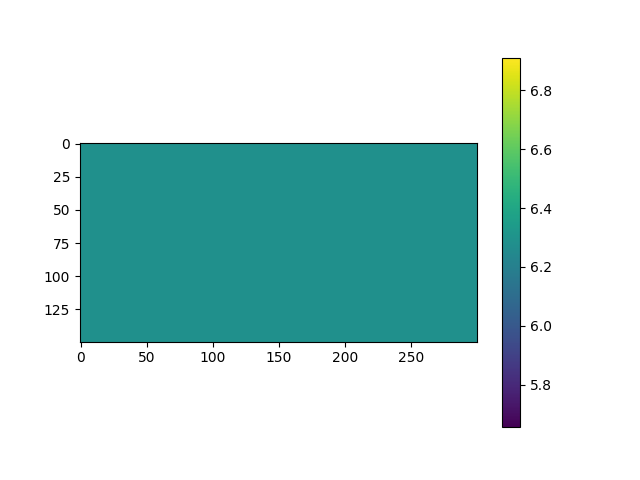

In [78]:
fig,ax = plt.subplots(1)
obj = ax.imshow(np.angle(picture.T)+2*np.pi)#, norm=matplotlib.colors.LogNorm(vmin=np.min(np.angle(picture.T)+2*np.pi), vmax=np.max(np.angle(picture.T)+2*np.pi)))        
plt.colorbar(obj, ax=ax)